In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import scienceplots
import os
import seaborn as sns

torch.manual_seed(40)

plt.style.use(['science', 'bright'])
plt.rcParams['figure.dpi'] = 300

In [3]:
from src.simulator.prior import get_prior
from src.simulator.simulator import create_simulator
from src.inference.utils import load_model

prior = get_prior()
simulator = create_simulator()
density_estimator = load_model(os.path.join("..", "results", "inference", "trained_model_11.pkl"))

In [4]:
from sbi.inference import SNPE_C

inference = SNPE_C(prior=prior)
posterior = inference.build_posterior(density_estimator)
print(posterior)

Posterior p(θ|x) of type DirectPosterior. It samples the posterior network and rejects samples that
            lie outside of the prior bounds.


In [ ]:
true_parameter = torch.tensor([0.02212, 0.1206, 1.04077, 0.0522, 3.04, 0.9626])
x_observed = simulator(true_parameter)

torch.manual_seed(40)
samples = posterior.set_default_x(x_observed).sample((25000,))

Drawing 25000 posterior samples: 27500it [00:01, 14161.30it/s]


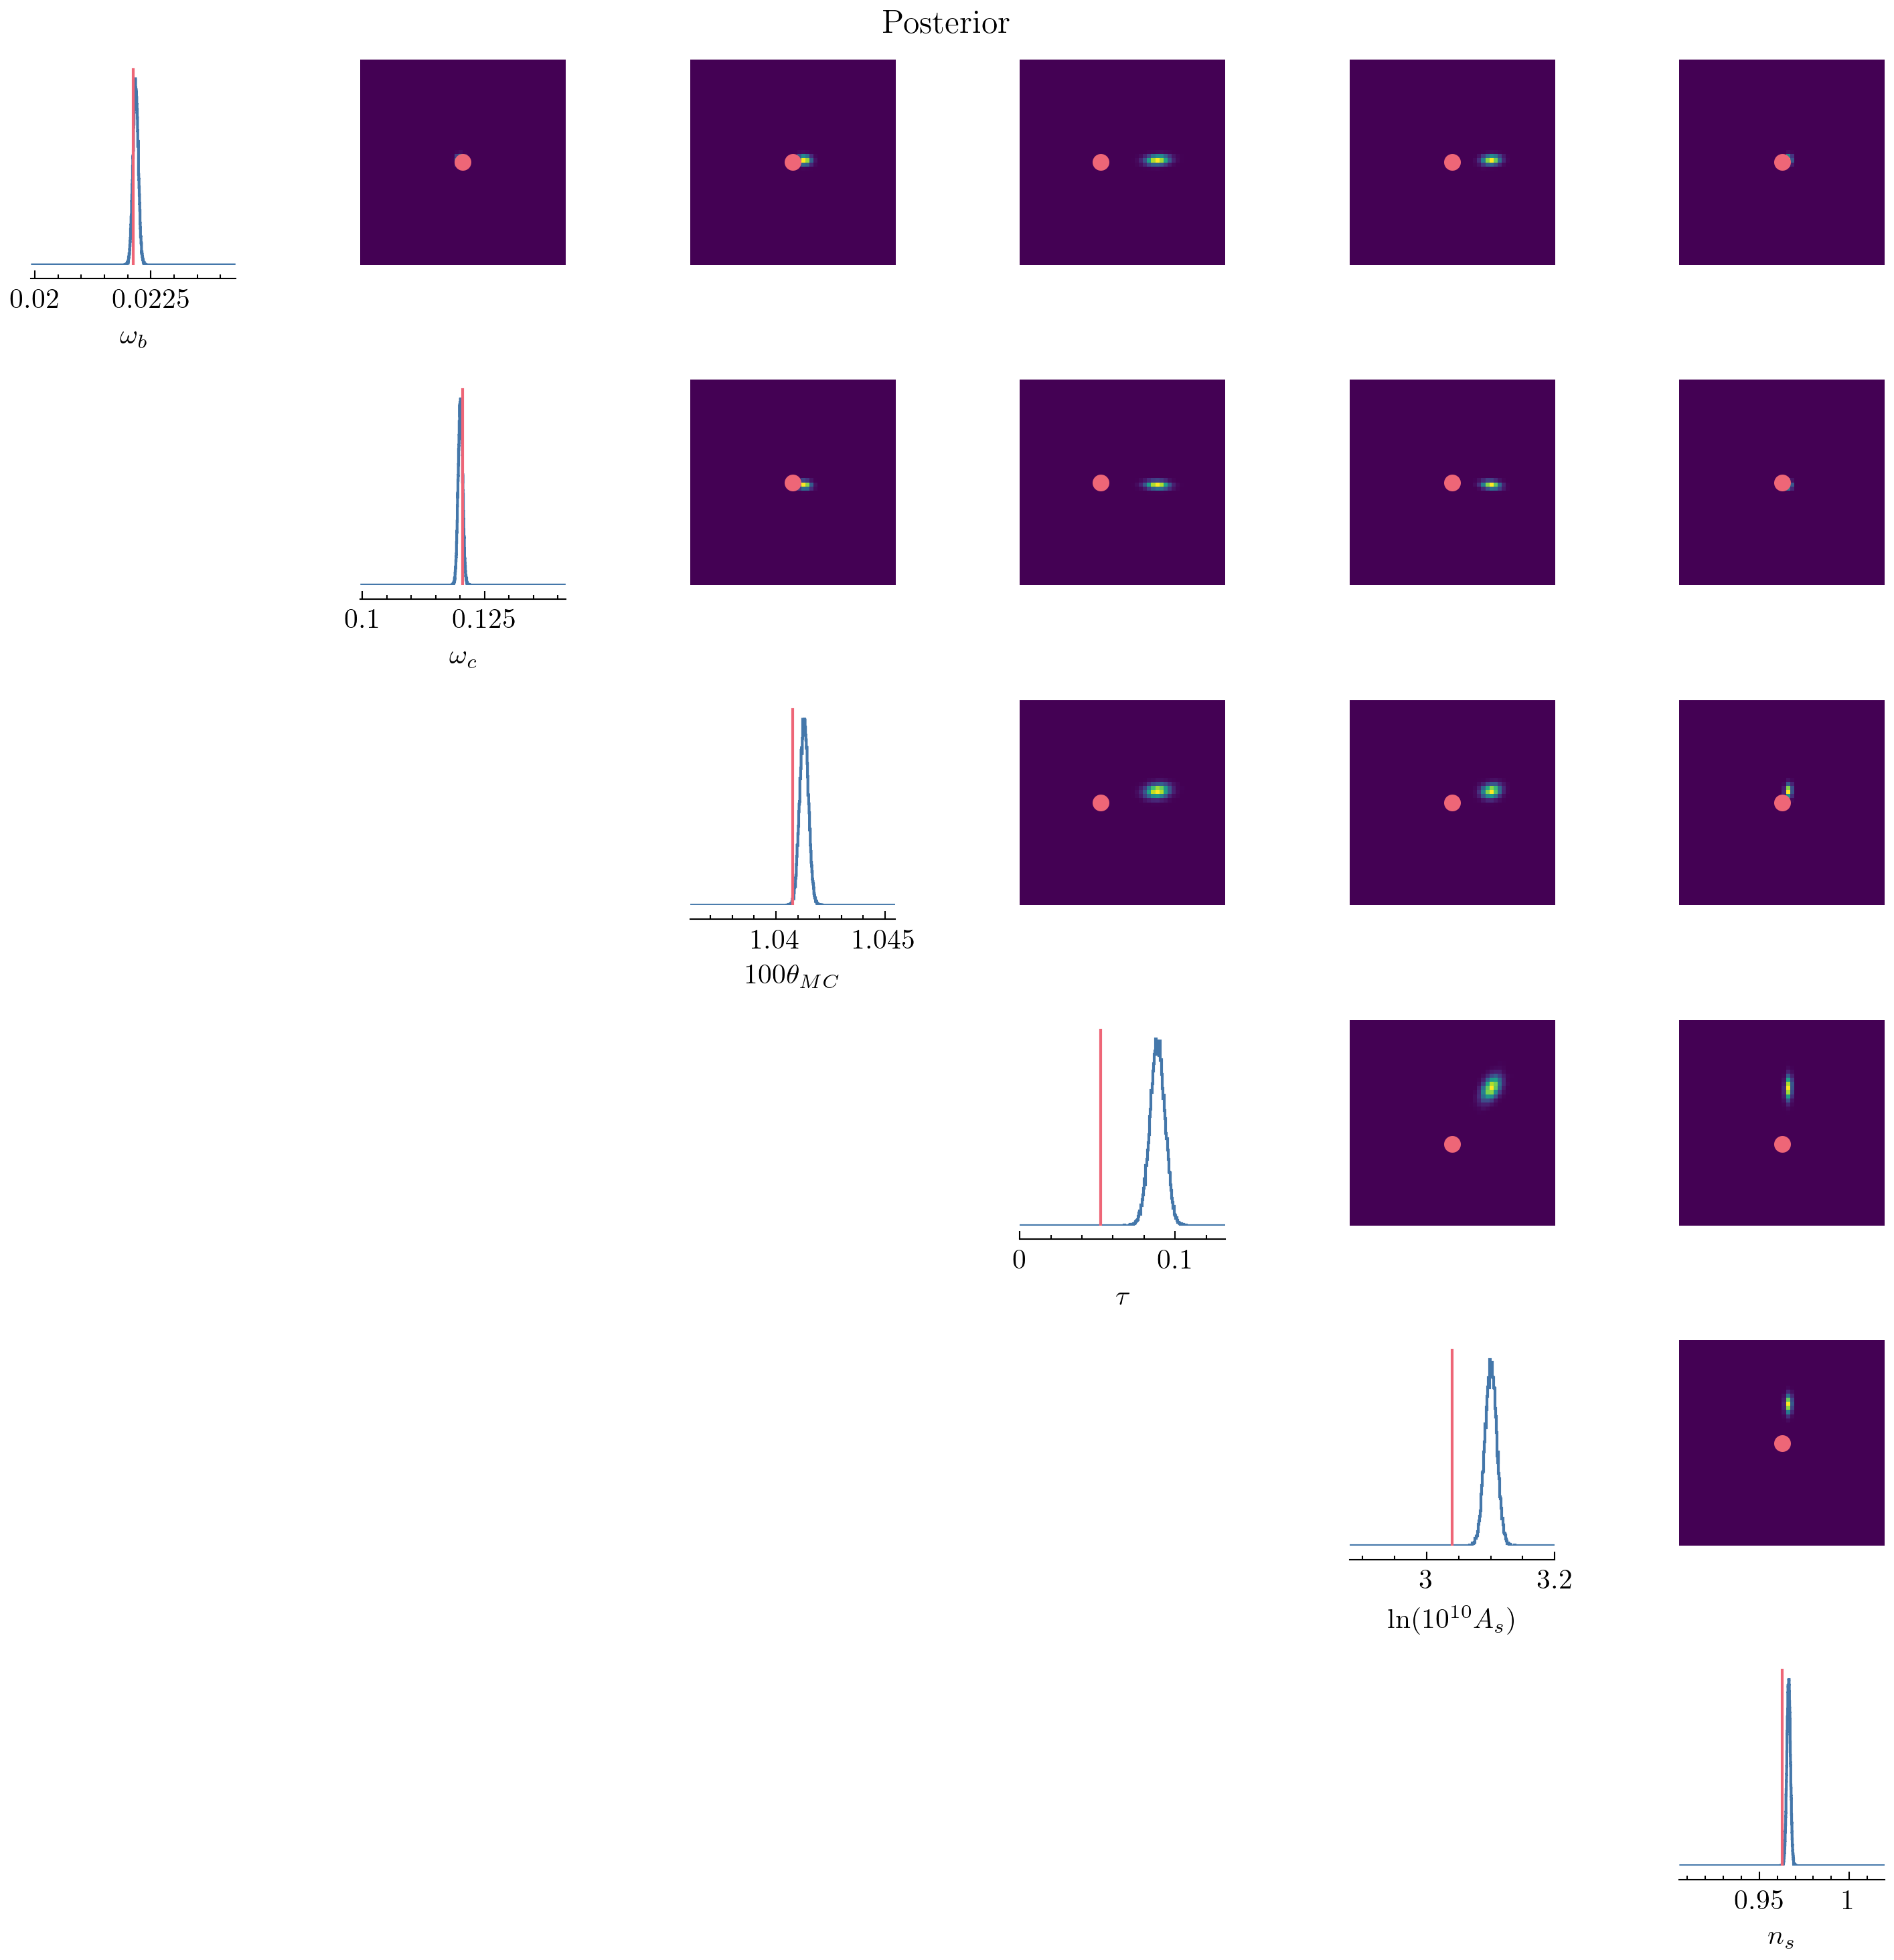

In [12]:
from sbi.analysis import pairplot

# --- LÍMITES DEL PRIOR ---
limits = torch.tensor([
    [0.01992, 0.02432],    
    [0.0996, 0.1416],  
    [1.03607, 1.04547],   
    [0.00, 0.1322],    
    [2.88, 3.2],    
    [0.9056, 1.0196],  
])

param_names = [r'$\omega_b$', r'$\omega_c$', r'$100\theta_{MC}$', r'$\tau$', r'$\ln(10^{10}A_s)$', r'$n_s$']

fig = pairplot(
    samples,
    points=true_parameter,
    figsize=(10, 10),
    limits=limits,
    labels=param_names
)

plt.suptitle('Posterior')
plt.tight_layout()
plt.show()